## Exploring NYC Flights Data
In this Notebook, we will be working on our first dataset. We will be exploring 2013 flight data from airports in New York city. In the process of exploring this data, we will be covering basics on reading, processing, analyzing, and visualizing simple tabular datasets. This particular Notebook is mostly adopted from the [Introduction to Data and Probability](https://www.coursera.org/learn/probability-intro/home/welcome) course of Duke University, converted from R to Python and tweaked to match the needs of our CSMODEL course.

Our Notebooks in CSMODEL are designed to be guided learning activities. To use them, simply through the cells from top to bottom, following the directions along the way. If you find any unclear parts or mistakes in the Notebooks, kindly raise your concerns in the Discussion forums in our AnimoSpace or email me at thomas.tiam-lee@dlsu.edu.ph.

## pandas and matplotlib
**pandas** is a software library for Python that is designed for data manipulation and data analysis. **matplotlib** is a software libary for data visualization, which allows us to easily render various types of graphs. We will be using these two libraries in this Notebook.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Dataset
For this notebook, we will working on a dataset called `nycflights`. This dataset contains on-time information for a random sample of flights departing from airports in New York City in 2013.

The dataset is provided to you as a `.csv` file. `.csv` means comma-separated values. You can open the file in Notepad to see how it is exactly formatted.

**Question:** What does random sample mean in this case?
- a random sample means that the data provided is only a fraction of the population of the whole dataset, and are selected without bias via different random sampling techniques to represent the whole population.

If you view the `.csv` file in Excel, you can see that our dataset contains many **observations** (rows) across 15 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`year`**: Year.
- **`month`**: Month.
- **`day`**: Day.
- **`dep_time`**: Departure Time, in Eastern time zone.
- **`dep_delay`**: Departure delay, in minutes.
- **`arr_time`**: Arrival time, in the local time zone.
- **`arr_delay`**: Arrival delay, in minutes.
- **`carrier`**: Carrier, abbreviated.
- **`tailnum`**: Tail number of the airplane.
- **`flight`**: Flight number.
- **`origin`**: Flight origin, airport code.
- **`dest`**: Flight destination, airport code.
- **`air_time`**: Time in the air, in minutes.
- **`distance`**: Distance between the departure and arrival airports, in miles.
- **`hour`**: Scheduled departure hour.
- **`minute`**: Scheduled departure minute.

## Reading the Dataset

Our first step is to load the dataset using `pandas`. This will load the dataset into a pandas `DataFrame`. To load the dataset, we use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. Note that you may need to change the path depending on the location of the file in your machine.

In [4]:
flights_df = pd.read_csv('nycflights.csv')

The dataset should now be loaded in the `flights_df` variable. `flights_df` is a [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). It is a data structure for storing tabular data, and the main data structure used in pandas.

Whenever we load a new dataset, it is generally a good idea to call the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, which displays general information about the dataset.

In [8]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       32735 non-null  int64 
 1   month      32735 non-null  int64 
 2   day        32735 non-null  int64 
 3   dep_time   32735 non-null  int64 
 4   dep_delay  32735 non-null  int64 
 5   arr_time   32735 non-null  int64 
 6   arr_delay  32735 non-null  int64 
 7   carrier    32735 non-null  object
 8   tailnum    32735 non-null  object
 9   flight     32735 non-null  int64 
 10  origin     32735 non-null  object
 11  dest       32735 non-null  object
 12  air_time   32735 non-null  int64 
 13  distance   32735 non-null  int64 
 14  hour       32735 non-null  int64 
 15  minute     32735 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 4.0+ MB


**Question:** How many observations are there in the dataset?
- 16 observations

**Question:** What is the data type of the `distance` column?
- 64 bit integer

We can call the [`head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) function to display the first `n` rows of the dataset.

In [9]:
flights_df.head(10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2
5,2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17
6,2013,12,9,1259,14,1617,22,WN,N218WN,1428,EWR,HOU,240,1411,12,59
7,2013,8,13,1920,85,2032,71,B6,N284JB,1407,JFK,IAD,48,228,19,20
8,2013,9,26,725,-10,1027,-8,AA,N3FSAA,2279,LGA,MIA,148,1096,7,25
9,2013,4,30,1323,62,1549,60,EV,N12163,4162,EWR,JAX,110,820,13,23


We can call also call the [`tail`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) function to display the last `n` rows of the dataset.

Can you use the tail function to find out what is the `carrier` of the **last** row in the dataset?

In [12]:
# Write your code here
flights_df.tail(1)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
32734,2013,3,28,1813,-3,1942,-23,UA,N36272,1053,EWR,CLE,59,404,18,13


**Question:** What is the `carrier` of the last row of the dataset?
- UA

We can get the columns of the dataset by accessing the [`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) property of the `DataFrame`.

In [13]:
flights_df.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

## Exploratory Analysis

The `nycflights` data frame is a massive trove of information. Let's think about some questions we might want to answer with these data:

- We might want to find out how delayed flights headed to a particular destination tend to be. 
- We might want to evaluate how departure delays vary over months. 
- We might want to determine which of the three major NYC airports has a better on time percentage for departing flights.

In the following sections we will attempt to answer these questions using the dataset we have loaded.

### How Delayed Are Flights Headed to a Particular Destination?

To answer this question, the variables of interest are:
- **`arr_delay`**: Arrival delay, in minutes
- **`dest`**: Flight destination, airport code

We can select a specific column from a `DataFrame` as a `Series` by using square brackets. For example, we can get the arrival time delays of the various flights (in minutes) in the dataset by accessing the `arr_delay` column:

In [14]:
flights_df["arr_delay"]

0        -4
1        10
2        11
3       -34
4        -8
         ..
32730   -28
32731     8
32732   -19
32733    60
32734   -23
Name: arr_delay, Length: 32735, dtype: int64

Note that the data type of the column above is a `Series`.

In [15]:
type(flights_df["arr_delay"])

pandas.core.series.Series

**Practice!** Write code to select the `dest` column as a series.

In [18]:
# Write your code here
flights_df["dest"]

0        LAX
1        SJU
2        LAX
3        TPA
4        ORF
        ... 
32730    PIT
32731    LAS
32732    IAH
32733    CHS
32734    CLE
Name: dest, Length: 32735, dtype: object

We can also select a list of columns from the dataset by providing a list instead of the name of a single column. For example, we can select both the `arr_delay` and `dest` columns at the same time as follows:

In [19]:
flights_df[["arr_delay", "dest"]]

,arr_delay,dest
0,-4,LAX
1,10,SJU
2,11,LAX
3,-34,TPA
4,-8,ORF
...,...,...
32730,-28,PIT
32731,8,LAS
32732,-19,IAH
32733,60,CHS


Note that by doing this, we are getting a `DataFrame` (albeit a smaller one) instead of a `Series`.

In [20]:
type(flights_df[["arr_delay", "dest"]])

pandas.core.frame.DataFrame

A good way to get an understanding of numerical values in the dataset is to use a histogram. Let's use a histogram to visualize the arrival time delay across all the flights in the dataset. To do this, we will call the [`hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function of the `DataFrame` which in turn calls the appropriate matplotlib function.

Note that we also call the [`show`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html) function of matplotlib to display only the graph.

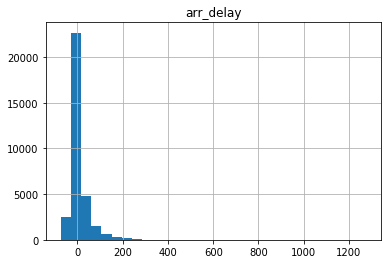

In [8]:
flights_df.hist("arr_delay", bins=30)
plt.show()

You can play around the `bins` parameter by changing its value above.

Let's say we want to investigate the arrival time delays for flights headed to Raleigh-Durham (RDU) only. To do this, we have to consider **only the observations in which the destination is `RDU`**.

We can filter observations based on certain conditions by specifying a condition as follows.

In [9]:
flights_df[flights_df["dest"] == "RDU"]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
94,2013,6,20,1729,23,1903,15,EV,N27962,5977,EWR,RDU,68,416,17,29
113,2013,5,5,1503,13,1650,15,MQ,N827MQ,4403,JFK,RDU,76,427,15,3
161,2013,11,10,1907,7,2053,13,MQ,N857MQ,3591,LGA,RDU,68,431,19,7
195,2013,3,3,1505,15,1641,1,MQ,N835MQ,4403,JFK,RDU,68,427,15,5
290,2013,10,25,749,-6,916,-19,MQ,N821MQ,3363,JFK,RDU,68,427,7,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32542,2013,6,22,1722,22,1848,1,EV,N13997,4121,EWR,RDU,68,416,17,22
32650,2013,8,24,1150,-10,1329,-16,MQ,N725MQ,3404,LGA,RDU,69,431,11,50
32651,2013,2,14,2052,-8,2227,-8,MQ,N734MQ,4507,LGA,RDU,70,431,20,52
32719,2013,11,22,1159,-6,1344,-6,MQ,N512MQ,3404,LGA,RDU,65,431,11,59


As you can see, the above query resulted into a new `DataFrame` containing only the flights where `dest` is `RDU`. For now, we will assign this new `DataFrame` into a new variable for convenience.

In [10]:
flights_to_rdu_df = flights_df[flights_df["dest"] == "RDU"]

**Practice!** Can you plot a histogram of arrival time delays only for flights to RDU?

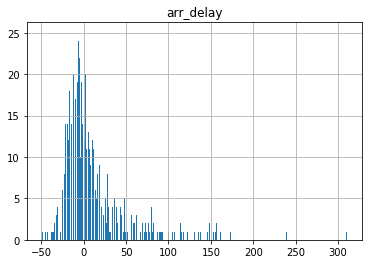

In [18]:
# Write your code here
flights_to_rdu_df.hist("arr_delay", bins=500)
plt.show()

**Question:** Which best describes the shape of the distribution of the arrival time delays for flights to RDU? (a) symmetric (b) positively-skewed (c) negatively-skewed (d) uniform
- the shape of the distribution is positively skewed

We can also aggregate some summary statistics regarding the arrival time delay using the [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) function. Note that for this function, we passed a dictionary where the key is a column name and the corresponding value is a list of functions that we want to apply to that column. We can pass either an actual function **or** a string containing the name of a common function such as `"mean"` or `"std"`. In this case, we want to get the mean, standard deviation and length of the `arr_delay` column.

In [19]:
flights_to_rdu_df.agg({"arr_delay": ["mean", "std", "count"]})

,arr_delay
mean,9.825218
std,38.914193
count,801.000000


**Question:** What is the average arrival time delay in minutes of flights headed to RDU?
- 9.8 minutes

Next, let's try to do the same thing for flights to San Francisco (SFO) airport in the month of February. We can filter observations using multiple criteria by using `&` (and) and `|` (or). Note that these are not the normal `and` and `or` operators in Python. These are bitwise operators that perform element-wise operations on two boolean lists. 

In [20]:
flights_to_sfo_in_feb_df = flights_df[(flights_df["dest"] == "SFO") & (flights_df["month"] == 2)]
flights_to_sfo_in_feb_df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
535,2013,2,18,1527,57,1903,48,DL,N711ZX,1322,JFK,SFO,358,2586,15,27
813,2013,2,3,613,14,1008,38,UA,N502UA,691,JFK,SFO,367,2586,6,13
1259,2013,2,15,955,-5,1313,-28,DL,N717TW,1765,JFK,SFO,338,2586,9,55
1527,2013,2,18,1928,15,2239,-6,UA,N24212,1214,EWR,SFO,353,2565,19,28
1873,2013,2,24,1340,2,1644,-21,UA,N76269,1111,EWR,SFO,341,2565,13,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29655,2013,2,21,1745,0,2106,-14,AA,N329AA,177,JFK,SFO,348,2586,17,45
29790,2013,2,3,1055,-5,1405,-20,UA,N510UA,642,JFK,SFO,351,2586,10,55
29806,2013,2,25,1855,0,2220,-20,VX,N624VA,29,JFK,SFO,367,2586,18,55
30563,2013,2,6,1654,-6,2015,-34,DL,N624AG,31,JFK,SFO,355,2586,16,54


Can you use the `agg` function to determine the **median** arrival delay of flights to SFO during the month of February?

In [23]:
# Write your code here. You may add extra cells if necessary.
flights_to_sfo_in_feb_df.agg({"arr_delay": ["median"]})

,arr_delay
median,-11.0


**Question:** What is the median arrival delay of flights to SFO during the month of February?
- -11.0

Now, can you find out the mean arrival delay of flights to Hartsfield–Jackson Atlanta (ATL) airport from the month of September to December?

In [28]:
# Write your code here. You may add extra cells if necessary.
new_df = flights_df[(flights_df["dest"]=="ATL") & (flights_df["month"]>8)]
new_df.agg({"arr_delay": ["mean"]})

,arr_delay
mean,9.342007


**Question:** What is the mean arrival delay of flights to ATL from September to December?
- 9.342007

### Which Month Has the Longest Delay in Departures in New York Airports?

Sometimes, we may want to form groups in the datasets and compute summary statistics for each group. For instance, to determine which month has a longest average delay in departures in the dataset, we need to compute the average for each month.

To do this, we can use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function. By providing a column name to this function, it will group the dataset based on the value of each observation for that function.

In [29]:
flights_df.groupby("month")

As you can see, calling `groupby` returns a `DataFrameGroupBy` object. We then call the `agg` function to this object so that it performs the aggregation **per group** instead of using the whole dataset.

In [30]:
flights_df.groupby("month").agg({"dep_delay": ["mean", "std"]})

dep_delay           
            mean        std
month                      
1      10.233333  42.386208
2      10.687227  33.115879
3      13.517602  40.291106
4      14.554477  43.421545
5      13.264800  38.254973
6      20.350293  53.514525
7      20.754559  47.777209
8      12.619097  39.221086
9       6.872436  35.344786
10      5.880374  29.369757
11      6.103183  27.633642
12     17.368189  43.013227

You can sort a `DataFrame` by a column using the `sort_values` function. Let's try to sort the resulting table above in descending order so that we can easily see which month has the longest average departure delay.

In [39]:
flights_df.groupby("month").agg({"dep_delay": ["mean", "std"]}).sort_values(("dep_delay", "mean"), ascending=False)

dep_delay           
            mean        std
month                      
7      20.754559  47.777209
6      20.350293  53.514525
12     17.368189  43.013227
4      14.554477  43.421545
3      13.517602  40.291106
5      13.264800  38.254973
8      12.619097  39.221086
2      10.687227  33.115879
1      10.233333  42.386208
9       6.872436  35.344786
11      6.103183  27.633642
10      5.880374  29.369757

Note that `sort_value` accepts the variable name you want to sort as the parameter. In this case, we pass in the **tuple** `("dep_delay", "mean")` because if you look at the `DataFrame` in the previous cell, we have a hierharchical structure for the column names where the first level is `dep_delay`, and the `mean` column is under that column.

**Question:** Which month has the longest average delay in departure?
- July

**Practice!** Find out which month has the highest median of average delay in departure time. Make sure to sort the median values per month in descending order.

In [70]:
# Write your code here. You may add extra cells if necessary.
flights_df.groupby("month").agg({"dep_delay": ["median", "mean"]}).sort_values(("dep_delay", "median"), ascending=False)

dep_delay           
         median       mean
month                     
12            1  17.368189
6             0  20.350293
7             0  20.754559
3            -1  13.517602
5            -1  13.264800
8            -1  12.619097
1            -2  10.233333
2            -2  10.687227
4            -2  14.554477
11           -2   6.103183
9            -3   6.872436
10           -3   5.880374

**Question:** If you can choose which month you want to travel from NYC, using only the departure delay as the basis for your decision, which month is the **worst** month to travel? Do you think it's a better idea to use the mean or the median as the basis for this decision? Why?
- according to the previous results, the highest average departure delay is during July, however the highest median is for the month of December. I think that it is better to conclude that it is worse to travel on December rather than July because there could be outliers that greatly affect the mean value. The outliers could have been specific scenarios that are not necessarily caused by the month of the flight. This makes the median a more trustworthy measure of central tendency in this scenario.

We can also visualize the departure delays per month by using a side-by-side boxplot from the [`boxplot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function of matplotlib. Notice that you can control the size of the figures in matplotlib using the `figsize` parameter (also works in other plots).

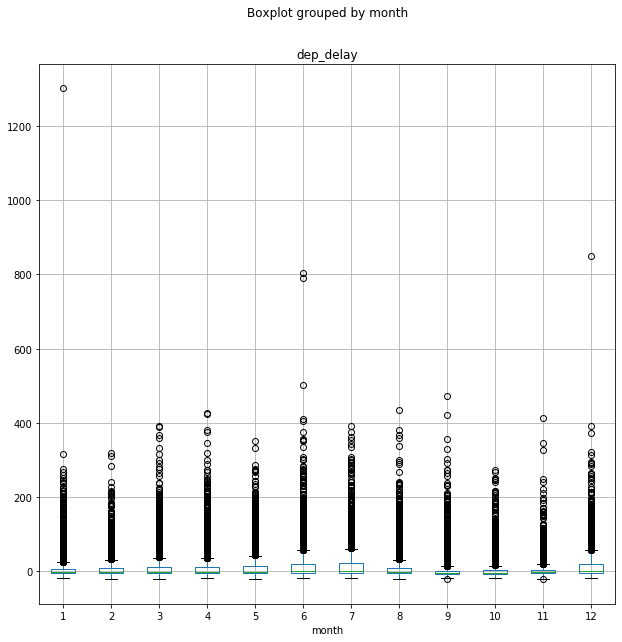

In [71]:
flights_df.boxplot("dep_delay", by="month", figsize=(10,10))
plt.show()

We can zoom in a little by specifying the limits of the y axis to be displayed in the graph (also applies to other types of graphs). **Warning:** Note that this truncates some of the data out of view. Please be aware about this.

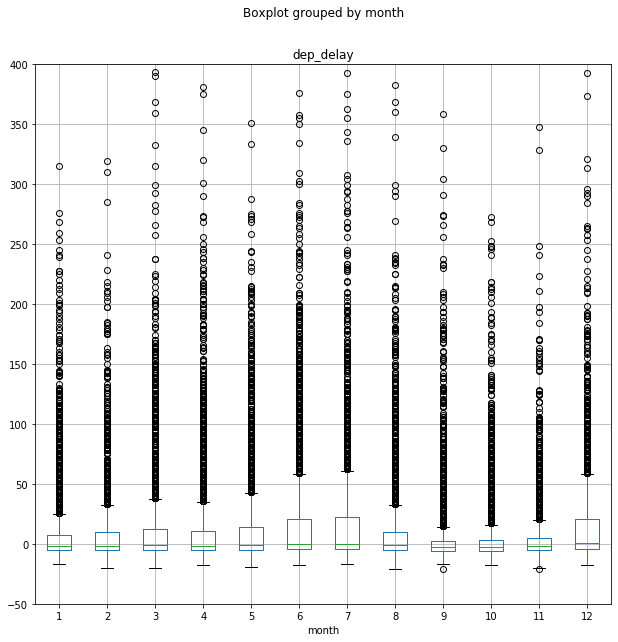

In [72]:
flights_df.boxplot("dep_delay", by="month", figsize=(10,10))
plt.ylim((-50, 400))
plt.show()

### What is the On-Time Departure Rate for NYC Airports?

Finally, let's try to find out the on-time departure rate for airports in New York City for the year 2013. The on-time departure rate of an airport is the percentage of flights that left on time over all the flights that departed from that airport.

Obviously, to be able to answer this question we must first perform some preliminary computations.

- We need to define whether each flight is "on time" or "delayed".
- We need to compute the percentage of "on time" flights per airport.

First, let try to classify each flight as "on time" or "delayed". For the purposes of this Notebook, we will define a flight to be "delayed" if the departure delay (`dep_delay`) is greater than 0. Otherwise, the flight is considered to be "on time".

We will now **add a column** to the dataset called `dep_type`. This column will contain the status of the departure ("on time" or "delayed"). In pandas, we can add columns easily by assigning the list of values of the new column to the `DataFrame` indexed with the new column name.

In [73]:
flights_df["dep_type"] = np.where(flights_df["dep_delay"] <= 0, "on time", "delayed")
flights_df.head(10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,dep_type
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,delayed
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,on time
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,on time
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,on time
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,on time
5,2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17,on time
6,2013,12,9,1259,14,1617,22,WN,N218WN,1428,EWR,HOU,240,1411,12,59,delayed
7,2013,8,13,1920,85,2032,71,B6,N284JB,1407,JFK,IAD,48,228,19,20,delayed
8,2013,9,26,725,-10,1027,-8,AA,N3FSAA,2279,LGA,MIA,148,1096,7,25,on time
9,2013,4,30,1323,62,1549,60,EV,N12163,4162,EWR,JAX,110,820,13,23,delayed


If we scroll to the rightmost part of the `DataFrame`, we can see that a new column has been added called `dep_type`, containing the departure status for each flight.

The value of `dep_type` is evaluated using the NumPy function `np.where`, which takes in three parameters. The first parameter is a vector of boolean values. In this case, we specified `flights_df["dep_delay"] > 0`. This is like an element-wise `Series` to scalar operation, which compares each value of `dep_delay` to 0 and results into a `Series` of boolean values. The second parameter is the value to be assigned for every `True` value in the vector and the third parameter is the value to be assigned for every `False` value in the vector.

Now that we know which flights are on time and which flights are not, we have to group the data frame by `origin`, since we want to compute the on-time departure rate for each NYC airport. Then, we can use the `agg` function to compute the on-time departure rate for each group.

In [74]:
flights_df.groupby("origin").agg({"dep_type": [("on_time_rate", lambda x: sum(x == "on time") / len(x))]})

,dep_type
,on_time_rate
origin,
EWR,0.548806
JFK,0.618427
LGA,0.669216


Here, instead of using a predefined function like `"mean"`, we define a custom lambda function that computes the on-time ratio:

`lambda x: sum(x == "on time") / len(x))`

In this function, `x` is the `dep_type` column `Series`. `x == "on time"` performs element-wise vector to scalar operation and returns a boolean vector. The `sum` function then counts how many of those elements are `True`. Then, this number is divided by the total number of elements in `x`, resulting in the on-time ratio in each group.

Note that the function is passed as a tuple to `agg`, where the first element contains the name of the column "`on_time_rate`" and the second column contains the lambda function itself.

**Question:** If you were selecting which airport to fly from in NYC simply based on the on-time departure rate, which airport would you choose?

- I would choose LGA because it has the highest on-time departure rate

## Test Yourself

Accomplish the following tasks using the `nycflights` dataset. To reset everything, the next cell reloads the dataset from the `.csv` file again (you may need to change the path). Make sure that all succeeding code from this point onwards works on the original state of the dataset.

In [4]:
flights_df = pd.read_csv('nycflights.csv')
flights_df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32730,2013,10,8,752,-8,921,-28,9E,N8505Q,3611,JFK,PIT,63,340,7,52
32731,2013,7,7,812,-3,1043,8,DL,N6713Y,1429,JFK,LAS,286,2248,8,12
32732,2013,9,3,1057,-1,1319,-19,UA,N77871,1545,EWR,IAH,180,1400,10,57
32733,2013,10,15,844,56,1045,60,B6,N258JB,1273,JFK,CHS,93,636,8,44


### What percentage of the dataset are flights that depart on time but arrive late?

Figure out what percentage of the observations in the dataset are flights that have a departure delay of 0 or less but have an arrival delay of more than 0.

In [5]:
# Write your code here. You may add extra cells if necessary.
flights_df["dep_type"] = np.where(flights_df["dep_delay"] <= 0, "on time", "delayed")
flights_df["arr_type"] = np.where(flights_df["arr_delay"] > 0, "late", "on time")
ontime_late_df =flights_df[(flights_df["dep_type"] == "on time") & (flights_df["arr_type"] == "late")]
len(ontime_late_df) / len(flights_df)

0.1274171376202841

What is the percentage?

- the percentage is 12.74%

### Which aircraft has the fastest average speed?

Add a column to the data frame so that it includes a new variable that contains the average speed, `avg_speed` traveled by the plane for each flight (in mph).

**Hint:** Average speed can be calculated as distance divided by number of hours of travel, and note that `air_time` is given in **minutes**, not hours.

In [6]:
# Write your code here. You may add extra cells if necessary.
flights_df["avg_speed"] = flights_df["distance"]/(flights_df["air_time"]/60)

**Question:** What is the tail number of the plane with the fastest `avg_speed`? And what is the speed in mph?

In [7]:
# Write your code here. You may add extra cells if necessary.
flights_df.sort_values("avg_speed", ascending=False)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,dep_type,arr_type,avg_speed
5066,2013,5,25,1709,9,1923,-14,DL,N666DN,1499,LGA,ATL,65,762,17,9,delayed,on time,703.384615
1266,2013,2,21,2355,-3,412,-26,B6,N779JB,707,JFK,SJU,172,1598,23,55,on time,on time,557.441860
21580,2013,11,16,2349,-10,402,-38,B6,N571JB,1503,JFK,SJU,173,1598,23,49,on time,on time,554.219653
1128,2013,2,22,831,4,1258,-18,B6,N568JB,403,JFK,SJU,175,1598,8,31,delayed,on time,547.885714
12261,2013,12,5,1628,-2,2045,-45,AA,N5EHAA,95,JFK,SJU,175,1598,16,28,on time,on time,547.885714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544,2013,5,11,738,-7,842,-10,US,N957UW,1821,LGA,PHL,49,96,7,38,on time,on time,117.551020
396,2013,5,24,553,-7,712,17,US,N957UW,1289,LGA,PHL,50,96,5,53,on time,late,115.200000
1373,2013,4,22,946,-9,1134,26,9E,N8623A,3608,JFK,PHL,50,94,9,46,on time,late,112.800000
17253,2013,7,19,559,-1,713,18,US,N959UW,1629,LGA,PHL,52,96,5,59,on time,late,110.769231


- The tailnumber of the plane with the fastest avg speed is N666DN, and its avg speed is 703.38 mph

You may Google this tail number to find out more about the aircraft.

### Which quarter has the lowest average departure delay?

Assuming the following:
- Q1: January to March
- Q2: April to June
- Q3: July to September
- Q4: October to December

Figure out which quarter has the lowest average departure delay across all aiports in NYC.

In [8]:
# Write your code here. You may add extra cells if necessary.
flights_df["quarter"] = ((flights_df["month"]-1) // 3) + 1
flights_df.groupby("quarter").agg({"dep_delay": ["mean"]})

,dep_delay
,mean
quarter,
1,11.580425
2,16.017879
3,13.450199
4,9.697708


**Question:** Which quarter has the lowest average departure delay?

- the fourth quarter has the lowest average departure delay

### Find the plane with the highest on-time flight rate

An **on time flight rate** is the number of flights with both **on time departure** and **on time arrivals** divided by the **total number of flights made by the plane**. We can find this by first creating another column denoting whether the flight is an on time flight or not

In [9]:
flights_df["flight_type"] = np.where((flights_df["dep_type"]=="on time") & (flights_df["arr_type"]=="on time"), "on time", "not on time")
flights_df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,dest,air_time,distance,hour,minute,dep_type,arr_type,avg_speed,quarter,flight_type
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,...,LAX,313,2475,9,40,delayed,on time,474.440895,2,not on time
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,...,SJU,216,1598,16,57,on time,late,443.888889,2,not on time
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,...,LAX,376,2475,8,59,on time,late,394.946809,4,not on time
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,...,TPA,135,1005,18,41,on time,on time,446.666667,2,on time
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,...,ORF,50,296,11,2,on time,on time,355.200000,3,on time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32730,2013,10,8,752,-8,921,-28,9E,N8505Q,3611,...,PIT,63,340,7,52,on time,on time,323.809524,4,on time
32731,2013,7,7,812,-3,1043,8,DL,N6713Y,1429,...,LAS,286,2248,8,12,on time,late,471.608392,3,not on time
32732,2013,9,3,1057,-1,1319,-19,UA,N77871,1545,...,IAH,180,1400,10,57,on time,on time,466.666667,3,on time
32733,2013,10,15,844,56,1045,60,B6,N258JB,1273,...,CHS,93,636,8,44,delayed,late,410.322581,4,not on time


Next, we can create another data frame grouped according to the tailnums to identify the count of how many on time flights were made by each plane

In [11]:
planes_df = flights_df.groupby("tailnum").agg({"tailnum": ["count"], "flight_type": [("on time" ,lambda x: sum(x == "on time"))]})

planes_df.columns = planes_df.columns.get_level_values(0) #flattened the multiindex
planes_df.rename(columns = {'tailnum':"numFlights", "flight_type":"on time"}, inplace = True) #rename columns

planes_df["on time rate"] = planes_df["on time"] / planes_df["numFlights"]
planes_df.sort_values(["on time rate", "numFlights"], ascending=False)

,numFlights,on time,on time rate
tailnum,,,
N3JVAA,7,7,1.0
N427UA,7,7,1.0
N660DL,7,7,1.0
N3JRAA,6,6,1.0
N4XTAA,6,6,1.0
...,...,...,...
N959DN,1,0,0.0
N960DN,1,0,0.0
N970AT,1,0,0.0


From the new dataframe created we can see that there are multiple planes with a 100% on time rate, and that multiple planes are also tied up with the most flights and a hundred percent on time rate. Well I guess I am a bit disappointed to find out that there is no only one super plane that has a perfect record but this has certainly added to my knowledge. Not only did I realize that there are many planes that have only flown a few times but also that the planes that have flown the most did not have a 100% on time rate.